<a href="https://colab.research.google.com/github/hqu/networkx_demo/blob/main/Epidemic_Simulation_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
G = nx.Graph()
G.clear()

In [3]:
def get_infected_nodes():
    infected_nodes = [x for x,y in G.nodes(data=True) if y['state']==1]
    return infected_nodes
def get_recovered_nodes():
    recovered_nodes = [x for x,y in G.nodes(data=True) if y['state']==2]
    return recovered_nodes
def get_susceptible_nodes():
    susceptible_nodes = [x for x,y in G.nodes(data=True) if y['state']==0]
    return susceptible_nodes

In [21]:
def print_stats():
    print("time periods: ", num_periods)
    print("peak cases: ", max(epi_curve_data))
    print("peak time period: ", epi_curve_data.index(max(epi_curve_data)))
    r0 = round(((alpha*avg_deg)/mu), 2)
    print("R0: ", r0)
    print("average degree: ", round(avg_deg, 0))
    print("Healthy left: ", len(get_susceptible_nodes()))

In [5]:
def spread_virus():
    infected_nodes_list = get_infected_nodes()
    t = 0
    infected_num_list = []
    recovered_num_list = []
    susceptible_num_list = []
    while(len(infected_nodes_list)>0):
        t=t+1
        infected_nodes_list = get_infected_nodes()
        num_infected = len(infected_nodes_list)
        recovered_nodes_list = get_recovered_nodes()
        num_recovered = len(recovered_nodes_list)
        susceptible_nodes_list = get_susceptible_nodes()
        num_susceptible = len(susceptible_nodes_list)        
        infected_num_list.append(num_infected)
        recovered_num_list.append(num_recovered)
        susceptible_num_list.append(num_susceptible)
        for i in infected_nodes_list:
            neibs = list(G.neighbors(i))
            #print("node: "+str(i))
            for j in neibs:
                #print(j)
                if (G.nodes[j]['state']==0):
                    #print(j)
                    if (np.random.binomial(1,alpha) == 1):
                        #print("neib: "+str(j))
                        G.nodes[j]['state']=1
                        #print("state: "+ str(G.nodes[j]['state']))
            if (np.random.binomial(1,mu) == 1):
                G.nodes[i]['state']=2
        infected_nodes_list = get_infected_nodes()
        #print(infected_nodes_list)
    return t, infected_num_list, recovered_num_list, susceptible_num_list

In [6]:
def init_conditions():
    state = 0
    nx.set_node_attributes(G, state, "state")
    G.nodes[6]['state'] = 1
    G.nodes[3]['state'] = 1
    G.nodes[2]['state'] = 1

In [7]:
G = nx.Graph()
G.clear()
n =10000
p =.001
G = nx.erdos_renyi_graph(n, p)

In [8]:
mu = .9
alpha = .2

In [48]:
infectiousness = 0.2 #@param {type:"slider", min:0.1, max:0.6, step:0.1}


In [49]:
recovery_speed = 0.9 #@param {type:"slider", min:0.1, max:0.9, step:0.1}

In [50]:
connectivity = 0.001 #@param {type:"slider", min:0.001, max:0.009, step:0.001}

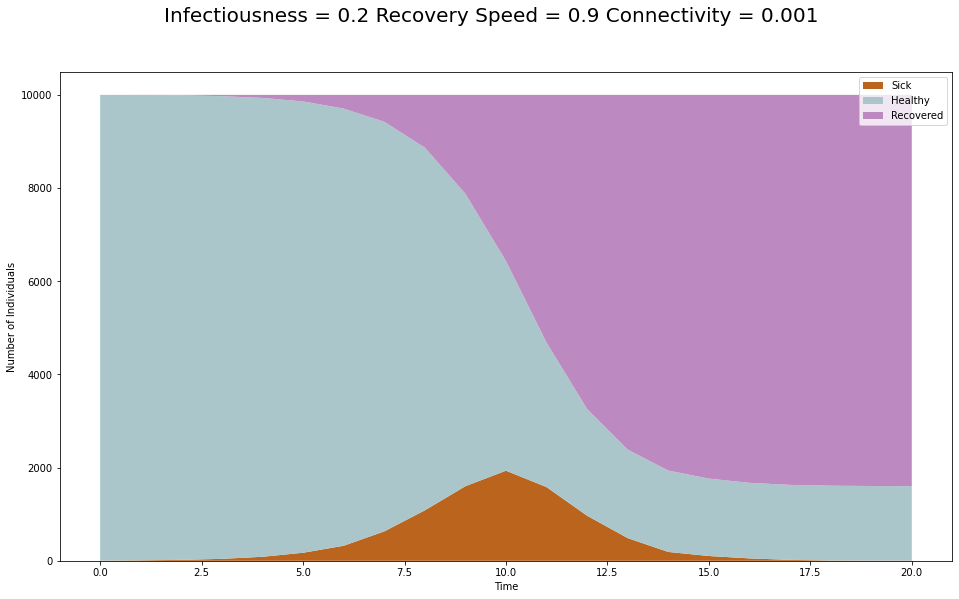

In [51]:
alpha = infectiousness
mu = recovery_speed
if(p!=connectivity):
  G = nx.erdos_renyi_graph(n, connectivity)
  p = connectivity
init_conditions()
degrees = [val for (node, val) in G.degree()]
avg_deg = G.number_of_edges()/n
num_periods, epi_curve_data, rec_curve_data, sup_curve_data = spread_virus()
x = list(range(0, len(epi_curve_data)))
fig = plt.figure(figsize=(16, 9))
ax = plt.axes()
#ax.set_yscale('log')
plt.stackplot(x,epi_curve_data, sup_curve_data, rec_curve_data, labels=['Sick','Healthy','Recovered'], colors=['BB641D','AAC6CA','BC8AC0'])
ax.set(xlabel='Time', ylabel='Number of Individuals')
fig.suptitle('Infectiousness = '+str(infectiousness) + ' Recovery Speed = '+str(recovery_speed) + ' Connectivity = '+str(connectivity) , fontsize=20)
plt.legend()

In [52]:
print_stats()

time periods:  21
peak cases:  1934
peak time period:  10
R0:  1.11
average degree:  5.0
Healthy left:  1596


In [53]:
epi_curve_data

[3,
 11,
 20,
 42,
 86,
 173,
 323,
 631,
 1083,
 1601,
 1934,
 1582,
 967,
 487,
 190,
 103,
 52,
 20,
 7,
 5,
 5]

In [54]:
rec_curve_data

[0,
 2,
 10,
 28,
 66,
 141,
 295,
 577,
 1133,
 2123,
 3566,
 5317,
 6744,
 7614,
 8064,
 8236,
 8327,
 8371,
 8388,
 8395,
 8399]

In [55]:
sup_curve_data

[9997,
 9987,
 9970,
 9930,
 9848,
 9686,
 9382,
 8792,
 7784,
 6276,
 4500,
 3101,
 2289,
 1899,
 1746,
 1661,
 1621,
 1609,
 1605,
 1600,
 1596]